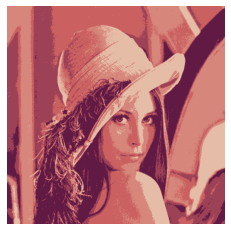

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot 

def read_and_scale_image(file_name):
    img = Image.open(file_name)
    matplotlib.pyplot.imshow(img)
    matplotlib.pyplot.axis('off')
    x,y=img.size
    data = np.array(img.getdata())
    points = data.reshape(x*y, -1)
    points=points/255
    return img,points

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    m, n = img_1d.shape
    centroids = np.zeros((k_clusters, n))
    if (init_centroids =='random'):
        for i in range(k_clusters):
            for j in range(n):
                centroids[i,j] = np.random.random()
    elif (init_centroids=='in_pixels'):
        for i in range(k_clusters):
            point = np.random.randint(0,m)
            centroids[i]= img_1d[point]

    label = np.zeros(m)
  
    while(max_iter > 0):
        for j in range(m):
            minv = float('inf')
            for k in range(k_clusters):
                x1=img_1d[j]
                x2=centroids[k]
                d=np.linalg.norm(x1-x2)
                if(d < minv):
                    minv = d
                    label[j] = k
        for k in range(k_clusters):
            sum = np.zeros(n)
            count = 0
            for j in range(m):
                if(label[j] == k):
                    sum += img_1d[j]
                    count += 1
            if(count == 0):
                count = 1
            
            centroids[k] = sum / count

        max_iter -= 1
  
    return centroids, label

def compress_image(centroids, label, img):
    recovered = centroids[label.astype(int), :]
      
    x, y=img.size
    recovered = np.reshape(recovered, (x, y, -1))
  
    matplotlib.pyplot.imshow(recovered)
    matplotlib.pyplot.axis('off')

img,img_1d = read_and_scale_image('Lenna_(test_image).png')
centroids, label=kmeans(img_1d, 5, 20,'in_pixels')
compress_image(centroids,label, img)